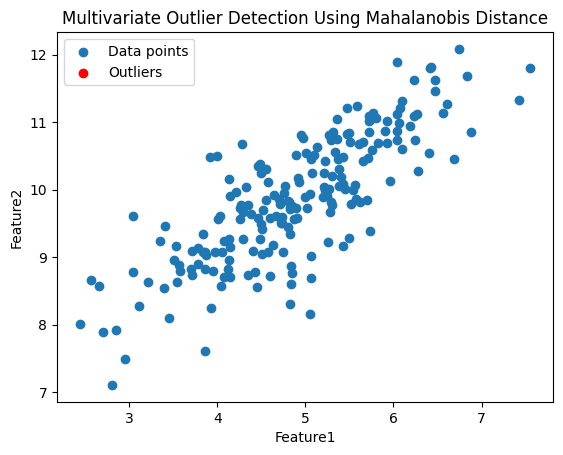

Outliers indices: []


In [3]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2

# Generate sample data with multivariate normal distribution
np.random.seed(10)
data = np.random.multivariate_normal([5, 10], [[1, 0.8], [0.8, 1]], 200)
df = pd.DataFrame(data, columns=["Feature1", "Feature2"])

# Calculate the mean and covariance matrix
mean = df.mean().values
cov_matrix = np.cov(df.T)

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the Mahalanobis distance for each point
mahalanobis_dist = []
for i in range(df.shape[0]):
    x_i = df.iloc[i].values
    diff = x_i - mean
    dist = np.sqrt(np.dot(np.dot(diff, inv_cov_matrix), diff.T))
    mahalanobis_dist.append(dist)

# Convert the list to a NumPy array
mahalanobis_dist = np.array(mahalanobis_dist)

# Calculate the critical value (threshold) for outlier detection
# For a 95% confidence level, use chi-squared distribution with 2 degrees of freedom (as we have 2 features)
threshold = chi2.ppf(0.95, df=df.shape[1])

# Identify outliers: Points where Mahalanobis distance is greater than the threshold
outliers = mahalanobis_dist > threshold

# Visualize the Mahalanobis distances and outliers
plt.scatter(df["Feature1"], df["Feature2"], label="Data points")
plt.scatter(df[outliers]["Feature1"], df[outliers]["Feature2"], color="red", label="Outliers")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Multivariate Outlier Detection Using Mahalanobis Distance")
plt.legend()
plt.show()

# Print outliers
print(f"Outliers indices: {np.where(outliers)[0]}")